In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset1 S2

In [2]:
""" Step 1: Load the data points and ground truth values (Some ground truth values may be in a different file) """
#======= 1. Dataset_1/S1.txt: N=5000 vectors and k=15 Gaussian cluster =======#

# s2 dataset
s2 = pd.read_csv(r'Part1_data\dataset_1\s2.txt', header = None, delim_whitespace=True)
s2.shape
s2.columns
s2.columns = ['X1', 'X2']

# s2 centroids
s2_cb = pd.read_csv(r'Part1_data\dataset_1\s-originals\s2-cb.txt', header = None, delim_whitespace=True)
s2_cb.shape
s2_cb.columns
s2_cb.columns = ['X1', 'X2']

#1 s2 labels
s2_l = pd.read_csv(r'Part1_data\dataset_1\s-originals\s2-label.pa')
s2_l.head()
# remove non-label content
s2_l = s2_l[4:]
s2_l.head()
s2_l.index = range(5000)

s2_l.shape
s2_l.columns
s2_l.info()
s2_l.describe()

# combine the X data and y_true label as a new dataframe
s2['Label'] = s2_l
s2.Label = s2.Label.astype(int)
s2.shape
s2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
VQ PARTITIONING 2.0    5000 non-null object
dtypes: object(1)
memory usage: 39.1+ KB


,X1,X2,Label
0,845753,636607,1
1,812954,643720,1
2,868217,609046,1
3,920248,607272,1
4,841621,639394,1


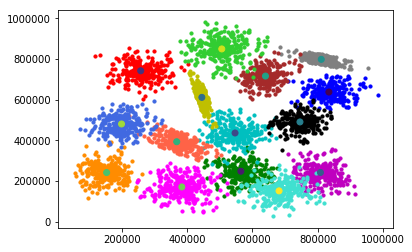

In [3]:
# supervised plot of all points using given label and centroids

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'grey','brown','tomato','darkorange','magenta','royalblue','limegreen','turquoise']
plt.figure()
for i in range(1, 16):
    #plt.scatter(X[:,0][y == i], X[:,1][y == i], s=30, cmap = i)
    plt.scatter(s2.X1[s2.Label == i], s2.X2[s2.Label == i], s=10, c=colors[i-1]) # color is repeated, use unique colors
plt.scatter(s2_cb.iloc[:,0], s2_cb.iloc[:,1], c = range(1, 16))
plt.show()

In [4]:
""" Step 3: Split data into train and test. """
from sklearn.model_selection import train_test_split

X = s2
y = s2.Label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 0)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

### knn

In [5]:
""" Step 4 (2 pts): Use KNN (own NumPy code & sklearn library) to clusters the data."""
# function 1. Euclidean Distance function between two rows
def euclidean_distance(row1, row2): 
    """This function returns the Euclidean Distance between two rows"""
    
    # this converts to np.arrays nn case that data sets are not converted
    row1, row2 = np.array(row1), np.array(row2)
    
    distance = 0
    for i in range(len(row1)):     #-1
        # sum of squared differences
        distance += np.square(row1[i] - row2[i])
    # return the square root of the sum
    return np.sqrt(distance)

#test code for func 2
X_train[0, :-1]
X_test[0, :-1]
euclidean_distance(X_train[0, :-1], X_test[0, :-1])

# function 2. predicting the class of a test row using knn algorithm
def predict(k, train_set, test_instance): #here we are defining our model
    """This function returns the nearest neighbors
        train_set: training data set that includes labels
        test_instance: a row in the test set that also include its label
        k: number of neighborhoods
    """
    # this converts to np.arrays nn case that data sets are not converted
    train_set = np.array(train_set)
    test_instance = np.array(test_instance)
    
    l = len(train_set)

    # empty list to store distances of each row in train set vs a row in test set
    distances = []
    for i in range(l): # -1
        # find the distance between each row of train set and the test instance (a single row)
        dist = euclidean_distance(train_set[i, :-1], test_instance)
        # append the row from train set and its distance to the test instance
        distances.append((train_set[i], dist))
        
    # sort the distances list by dist
    distances.sort(key = lambda x: x[1])
    
    # empty list to store k nearest neighbors
    neighbors = []    
    for i in range(k):
        # append the rows from train set in distances to neighborhoods
        neighbors.append(distances[i][0])
        
    # determine the class of a test instance
    classes = {}
    for i in range(len(neighbors)):
        # 
        response = neighbors[i][-1]
        
        # 
        if response in classes:
            classes[response] += 1
        # 
        else:
            classes[response] = 1
            
    # sort the values in classes in descending order
    sorted_classes = sorted(classes.items(), key = lambda x: x[1], reverse = True)
    
    # return the one has the highest vote
    return(sorted_classes[0][0])


# function 3. evaluate the model and returns accuracy
def evaluate(y_true, y_pred):
    """returns % of correct prediction"""
    
    # number of correct predictions
    correct = 0
    
    # iterate over 2 arrays at the same time
    for actual, pred in zip(y_true, y_pred):
        # if
        if actual == pred:
            correct += 1
    
    # accuray
    return str(np.round(correct /len(y_true)*100 ,2)) + '%'
## end of functions of KNN ##

## clustering
# empty list to store predictions
k = 15
y_pred = []
for i in range(len(X_test)):
    predictor = X_test[i, :-1]
    prediction = predict(k, X_train, predictor)
    y_pred.append(prediction)

# true labels
actual = np.array(y_test)
# evaluation
evaluate(actual, y_pred)


# KNN using sci-kit learn
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
y_knn = knn.predict(X_test)

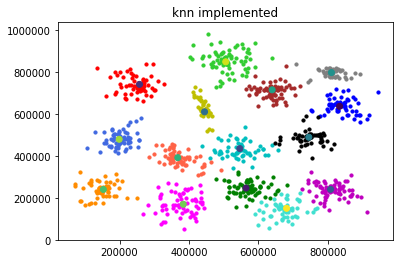

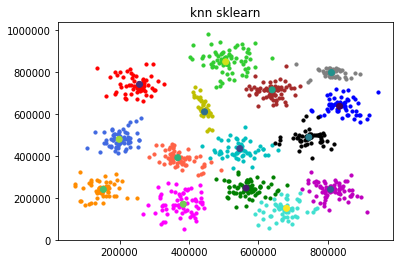

In [6]:
""" Step 5 (1 pts): Plot your result in different colors similar to Step 2. """

 # new arrays without labels
X_tr = X_train[:, :-1]
X_te = X_test[:, :-1]

# this is a plot of the test set
plt.figure()
for i in range(1, 16):
    plt.scatter(X_te[:, 0][np.array(y_pred) == i], X_te[:, 1][np.array(y_pred) == i], s=10, c = colors[i-1]) # color is repeated, use unique colors

plt.scatter(s2_cb.iloc[:,0], s2_cb.iloc[:,1], c = range(1, 16))
plt.title('knn implemented')
plt.show()

plt.figure()
for i in range(1, 16):
    plt.scatter(X_te[:, 0][np.array(y_knn) == i], X_te[:, 1][np.array(y_knn) == i], s=10, c = colors[i-1]) # color is repeated, use unique colors

plt.scatter(s2_cb.iloc[:,0], s2_cb.iloc[:,1], c = range(1, 16))
plt.title('knn sklearn')
plt.show()

In [7]:
""" Step 6 (1 pts): Print the confusion matrix to check model performance. """
from sklearn.metrics import confusion_matrix
# cm_own
cm_own = confusion_matrix(y_test, y_pred) # y_pred is from my implementation
print(cm_own)
print(np.sum(np.diag(cm_own))/len(X_test))

# cm_sklearn
cm_knn = confusion_matrix(y_test, y_knn) # y_knn is from sklearn 
print(cm_knn)
print(np.sum(np.diag(cm_knn))/len(X_test))

[[57  0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0 67  0  1  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 57  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 74  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  1  0 51  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 61  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 57  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2 81  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 68  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 60  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 79  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 74  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0 78  0]
 [ 0  3  0  0  3  0  0  0  0  0  0  0  0  0 54]]
0.982
[[57  0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0 67  0  1  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 57  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 74  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  1  0 51  0  0  0  0  

### kmeans

In [8]:
"""Step 7 (4 pts): Repeat Steps 3 - 6 and use K-means (own NumPy code & sklearn library) to
perform the same. Additionally, print the centroids."""
from copy import deepcopy


######## same as step 3 but kmeans #########
K = 15 # Number of clusters
n = X_te.shape[0] # rows
c = X_te.shape[1] # cols except label

In [15]:
######## same as step 4 but kmeans #########
# random centroids
mean = np.mean(X_te, axis = 0)
mean
std = np.std(X_te, axis = 0)
std

centroids = np.random.randn(K,c)*std + mean
centroids

centroids_old = np.zeros(centroids.shape) # to store old centroids
centroids_old

centroids_new = deepcopy(centroids) # Store new centroids
centroids_new

clusters = np.zeros(n)
clusters
distances = np.zeros((n,K))
distances

# find the error between the old and new centroids
error = np.linalg.norm(centroids_new - centroids_old)
error

# When, after an update, the estimate of that center stays the same, exit loop

# number of iterations
n_iterations = 100

while error != 0:
    # Measure the distance to every center
    for i in range(K):
        distances[:,i] = np.linalg.norm(X_te - centroids_new[i], axis=1)
    
    # use minimum distance as reference to allocate data to the closest center
    clusters = np.argmin(distances, axis = 1)
    
    centroids_old = deepcopy(centroids_new)
    # Calculate mean for every cluster and update the center
    for i in range(K):
        centroids_new[i] = np.mean(X_te[clusters == i], axis=0)
    error = np.linalg.norm(centroids_new - centroids_old)
    
    print(error)
    n_iterations -= 1
    
print('\n new centroids:')
print(centroids_new)
print('\n')
## sklearn 

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 15, init = 'k-means++', random_state = 0)
kmeans.fit(X_train, y_train)
y_kmeans = kmeans.predict(X_test)
len(y_kmeans)
np.min(y_kmeans)
np.max(y_kmeans)

# relabeling by majority vote
y_kmeans_voted = y_kmeans.copy()
for i in range(0, 15):
    n = np.argmax(np.bincount(y_test[y_kmeans == i]))
    print(i, 'in y_kmeans is', n, 'in y_test')
    y_kmeans_voted[y_kmeans == i] = n

276096.21293135843
126290.80875229665
66670.37046154484
17905.108637387944
10484.887930512703
11282.779791167322
13554.367517212111
30641.554673816965
29059.50215677013
24690.43518675791
13546.421411171252
9271.655361166151
5843.998856100553
4032.561607874201
2560.942143297482
5749.707631426487
2853.357372643528
2130.290765170666
0.0

 new centroids:
[[847413.65       677357.15      ]
 [750585.26086957 199514.99275362]
 [599053.63636364 713948.09090909]
 [246526.140625   741577.34375   ]
 [833358.25641026 616298.71794872]
 [811648.28813559 797006.54237288]
 [518732.30232558 823575.23255814]
 [732967.77941176 481168.32352941]
 [652027.86885246 711043.85245902]
 [558063.00970874 302525.97087379]
 [198422.28       479129.85333333]
 [498556.94285714 895138.51428571]
 [455810.15       604420.85      ]
 [385012.41558442 394756.53246753]
 [276780.72058824 199228.54411765]]


0 in y_kmeans is 11 in y_test
1 in y_kmeans is 7 in y_test
2 in y_kmeans is 6 in y_test
3 in y_kmeans is 15 in y_test
4

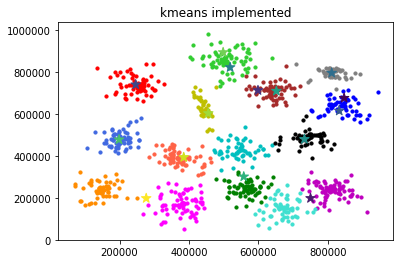

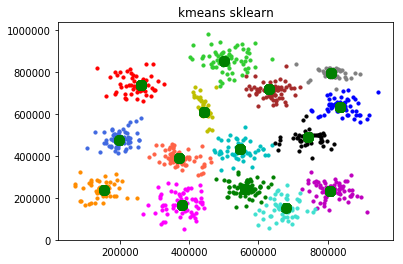

In [16]:
######## same as step 5 but kmeans #########

#plot 
plt.figure()
for i in range(1, 16):
    plt.scatter(X_te[:, 0][y_kmeans_voted == i], X_te[:, 1][y_kmeans_voted == i], s=10, c = colors[i-1])
plt.scatter(centroids_new[:,0], centroids_new[:,1], marker='*', c=range(1,16), s=100)
plt.title('kmeans implemented')
plt.show()

# Plot
plt.figure()
for i in range(1,16):
    plt.scatter(X_te[y_kmeans_voted == i, 0], X_te[y_kmeans_voted == i, 1], s = 10, c = colors[i-1], label = 'Cluster')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'green', label = 'Centroids')
plt.title('kmeans sklearn')
plt.show()

# X_te[y_kmeans == 1, 0] == X_te[:, 0][y_kmeans == 1]

In [17]:
######## same as step 6 but kmeans #########
# confusion matrix
cm_kmeans = confusion_matrix(y_test, y_kmeans_voted)
print(cm_kmeans)
np.sum(np.diag(cm_kmeans))/len(X_test)

[[57  0  0  0  0  0  1  1  0  0  0  0  0  0  0]
 [ 0 64  0  1  0  0  0  0  0  0  0  0  0  0  5]
 [ 0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  2  0  0  2  0  0  0  0  0]
 [ 0  0  0  0 74  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  1  0 51  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 61  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 57  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2 81  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0 67  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 60  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 79  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 74  0  0]
 [ 0  0  0  0  0  1  0  0  3  0  0  0  0 76  0]
 [ 0  2  0  0  4  0  0  0  0  0  0  0  0  0 54]]


0.973

In [12]:
"""Step 8 (1pts): Compare the results between KNN and K-means"""
# KNN has a much better result compare to KMeans in this case.
#  Kmeans has bad accuracy and cluters due to initiation, even with K-means ++

'Step 8 (1pts): Compare the results between KNN and K-means'